<a href="https://www.kaggle.com/code/anjusukumaran4/house-price-prediction-comparing-models?scriptVersionId=138043098" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

### This is my submission to the House Prices - Advanced Regression Techniques Competition and mae comparison using 4 different Models - Random Forest Regressor, XGB Regressor, CatBoost Regressor and Linear Regression.

Importing libraries

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load Data

In [2]:
#read data
train_df=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test_df=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
id=test_df['Id']

## EDA

In [3]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
print(f"Train shape: {train_df.shape}")
print(f"Test shape: {test_df.shape}")

Train shape: (1460, 81)
Test shape: (1459, 80)


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [8]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<AxesSubplot:xlabel='YrSold', ylabel='count'>

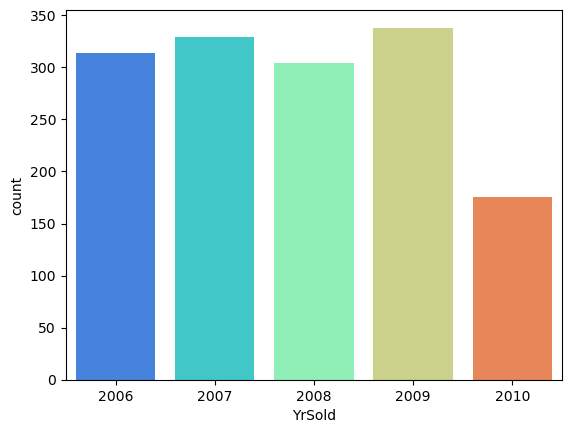

In [9]:
#analysing YrSold column using countplot
sns.countplot(x='YrSold',data=train_df,palette='rainbow')

<AxesSubplot:xlabel='SaleCondition', ylabel='count'>

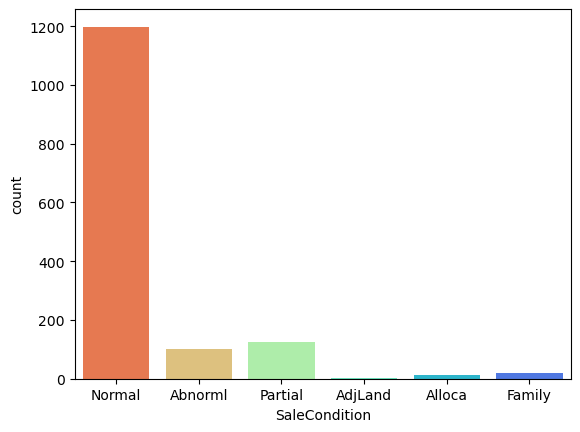

In [10]:
#analysing SaleCondition column using countplot
sns.countplot(x='SaleCondition',data=train_df,palette='rainbow_r')

<AxesSubplot:xlabel='YrSold', ylabel='SalePrice'>

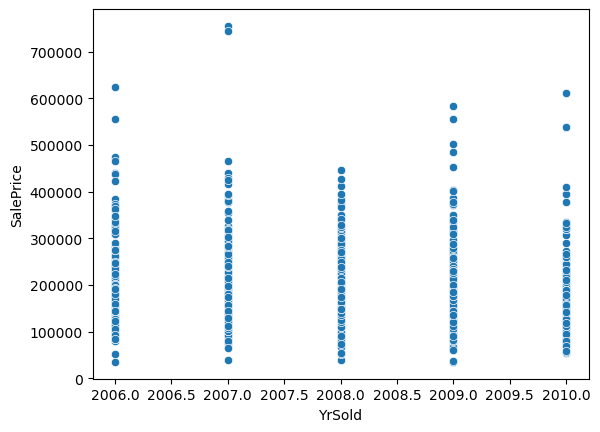

In [11]:
#analysing SalePrice using scatterplot
sns.scatterplot(y="SalePrice",x='YrSold',data=train_df,palette='r')

## Data Cleaning

In [12]:
#checking null values
train_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [13]:
#sort by null values in column
pd.set_option('display.max_rows',train_df.shape[0])
pd.DataFrame(train_df.isnull().sum().sort_values(ascending=False))

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageYrBlt,81
GarageCond,81
GarageType,81
GarageFinish,81


In [14]:
pd.set_option('display.max_rows',test_df.shape[0])
pd.DataFrame(test_df.isnull().sum().sort_values(ascending=False))

,0
PoolQC,1456
MiscFeature,1408
Alley,1352
Fence,1169
FireplaceQu,730
LotFrontage,227
GarageYrBlt,78
GarageQual,78
GarageFinish,78
GarageCond,78


In [15]:
#drop columns that null contain above 50% null values
null=train_df.isnull().sum()/train_df.shape[0]*100
col_to_drop=null[null>50].keys()
col_to_drop

Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [16]:
train_df.drop(col_to_drop,axis=1,inplace=True)

In [17]:
train_df.columns[train_df.isnull().any()]

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond'],
      dtype='object')

In [18]:
len(train_df.columns[train_df.isnull().any()])

15

In [19]:
#replace nullvalues
train_df['LotFrontage'] = train_df['LotFrontage'].fillna(train_df['LotFrontage'].mean())
train_df['MasVnrArea']  = train_df['MasVnrArea'].fillna(train_df['MasVnrArea'].mean())     
train_df['GarageYrBlt'] = train_df['GarageYrBlt'].fillna(train_df['GarageYrBlt'].mean())
train_df['MasVnrType']   = train_df['MasVnrType'].fillna(train_df['MasVnrType'].mode()[0])  
train_df['BsmtQual']     = train_df['BsmtQual'].fillna(train_df['BsmtQual'].mode()[0])  
train_df['BsmtCond']     = train_df['BsmtCond'].fillna(train_df['BsmtCond'].mode()[0])  
train_df['BsmtExposure'] = train_df['BsmtExposure'].fillna(train_df['BsmtExposure'].mode()[0])  
train_df['BsmtFinType1'] = train_df['BsmtFinType1'].fillna(train_df['BsmtFinType1'].mode()[0])  
train_df['BsmtFinType2'] = train_df['BsmtFinType2'].fillna(train_df['BsmtFinType2'].mode()[0])  
train_df['Electrical']   = train_df['Electrical'].fillna(train_df['Electrical'].mode()[0])  
train_df['FireplaceQu']  = train_df['FireplaceQu'].fillna(train_df['FireplaceQu'].mode()[0])  
train_df['GarageType']   = train_df['GarageType'].fillna(train_df['GarageType'].mode()[0])  
train_df['GarageFinish'] = train_df['GarageFinish'].fillna(train_df['GarageFinish'].mode()[0])  
train_df['GarageQual']   = train_df['GarageQual'].fillna(train_df['GarageQual'].mode()[0])  
train_df['GarageCond']   = train_df['GarageCond'].fillna(train_df['GarageCond'].mode()[0]) 

In [20]:
train_df.isnull().values.sum()

0

In [21]:
#checking correlation
train_df.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.009601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050199,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022895,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.009601,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.179283,0.215828,...,0.077106,0.137454,0.009790,0.062335,0.037684,0.180868,0.001168,0.010158,0.006768,0.334901
LotArea,-0.033226,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103960,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.052820,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.127788,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.117598,0.014228,0.572323,-0.375983,1.000000,0.592855,0.314745,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.082746,0.013788,0.550684,0.073741,0.592855,1.000000,0.179186,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050199,0.022895,0.179283,0.103960,0.410238,-0.127788,0.314745,0.179186,1.000000,0.263582,...,0.159349,0.124965,-0.109849,0.018795,0.061453,0.011723,-0.029815,-0.005940,-0.008184,0.475241
BsmtFinSF1,-0.005024,-0.069836,0.215828,0.214103,0.239666,-0.046231,0.249503,0.128451,0.263582,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


#### Correlation Heatmap

<AxesSubplot:>

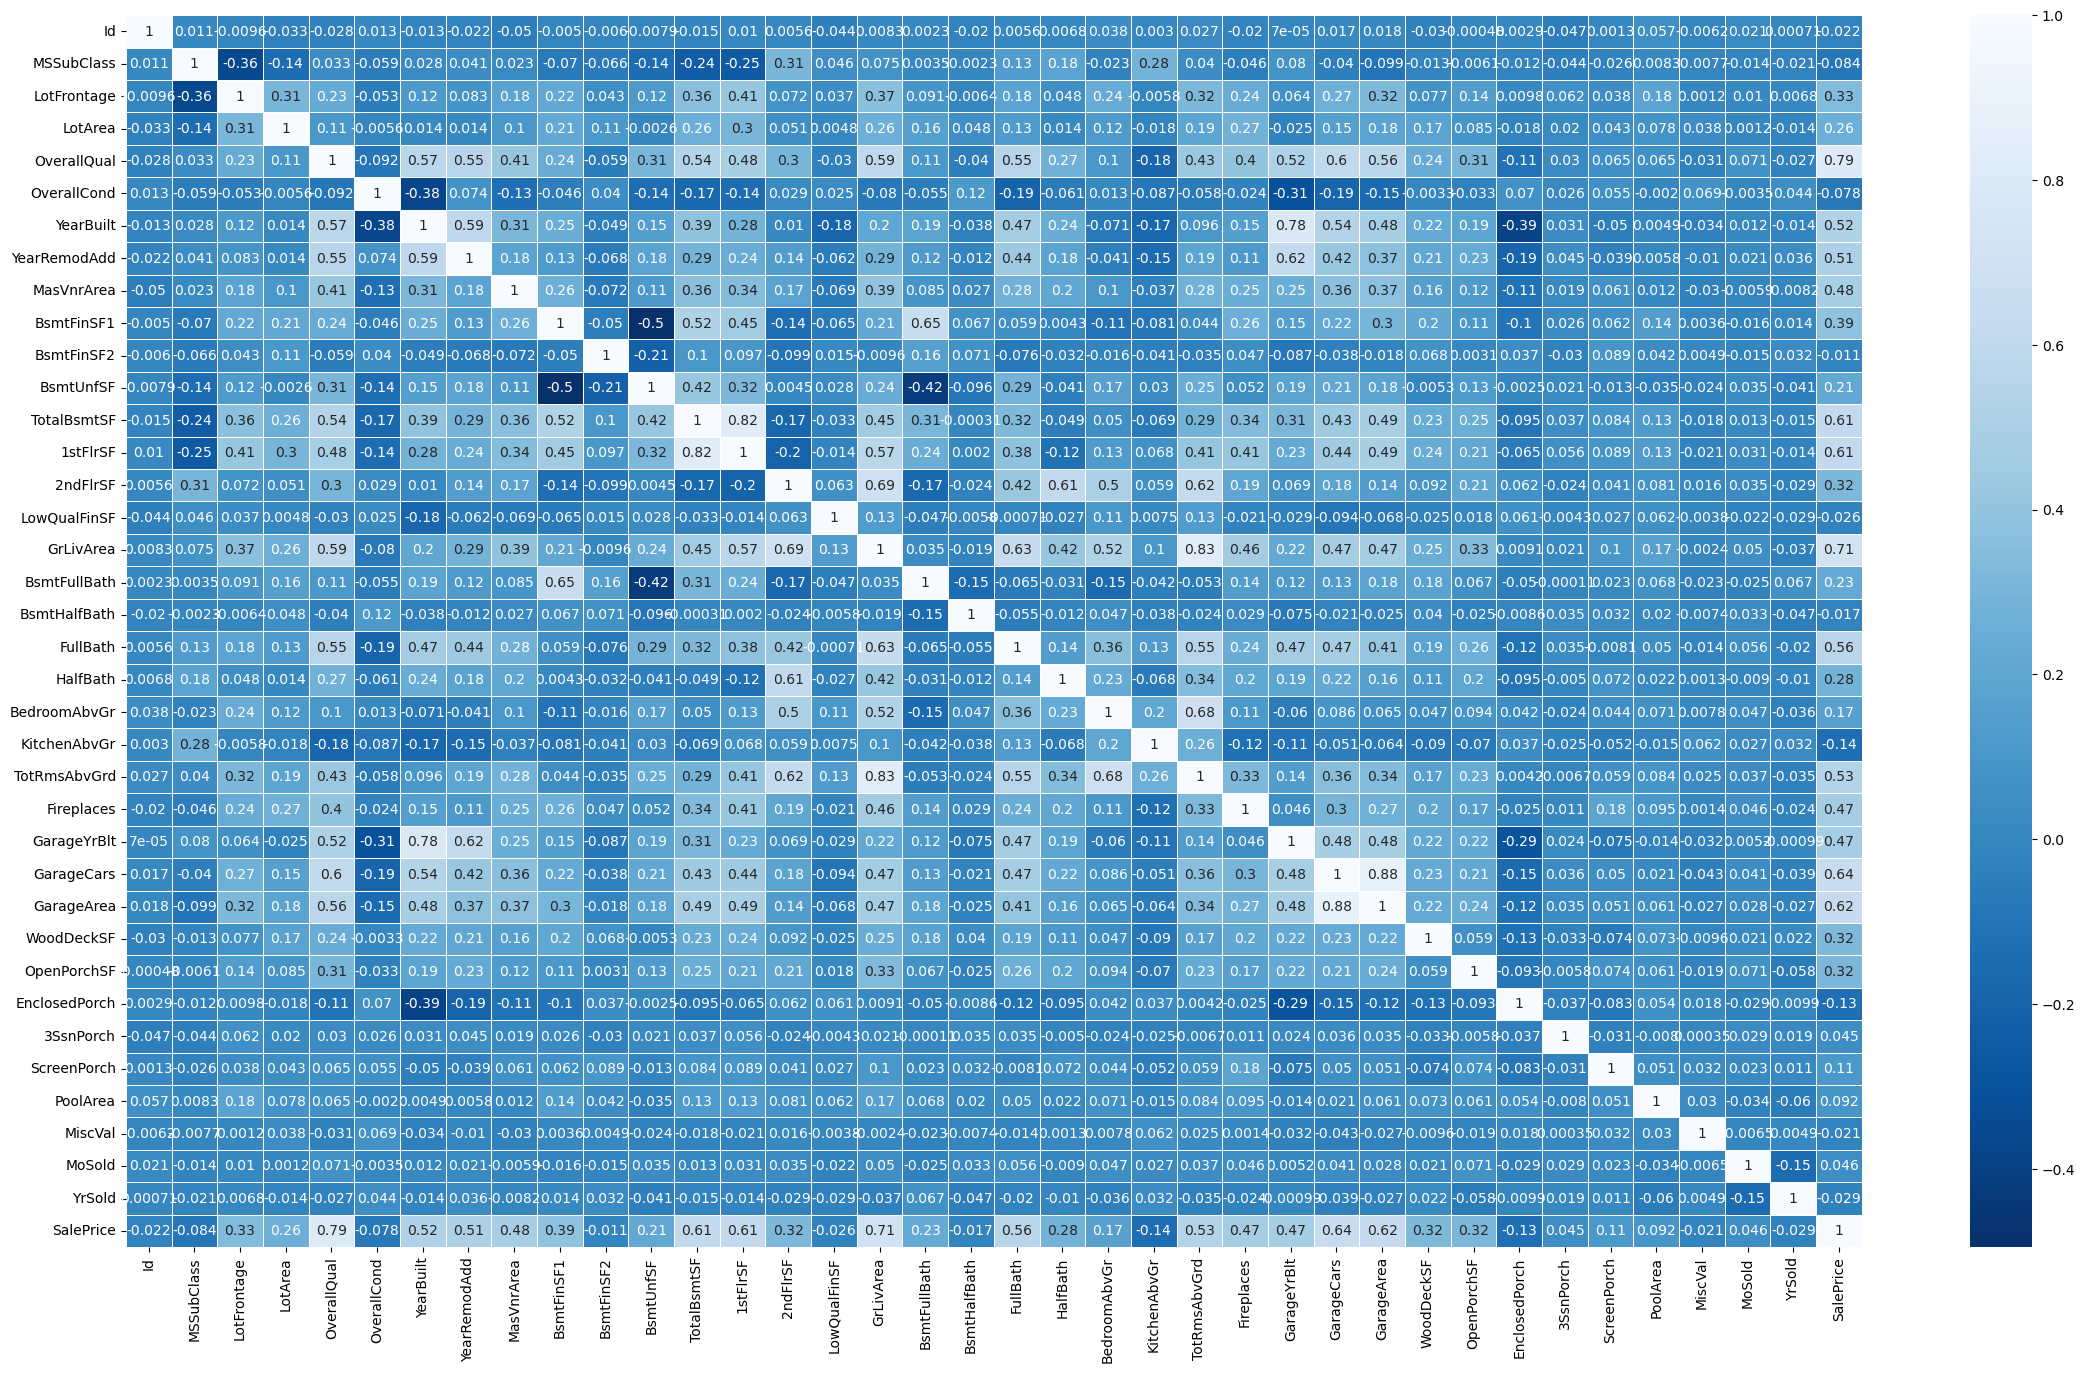

In [22]:
plt.figure(figsize=(28,16))
sns.heatmap(train_df.corr(),annot=True,linewidth=.5,cmap='Blues_r')

In [23]:
corr=train_df.corr()

high_corr_features=corr.index[abs(corr['SalePrice'])>0.52]
print(f'highly correlated feature:\n',high_corr_features)
print(f'No. of highly correlated features:',len(high_corr_features))

highly correlated feature:
 Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice'],
      dtype='object')
No. of highly correlated features: 10


<AxesSubplot:>

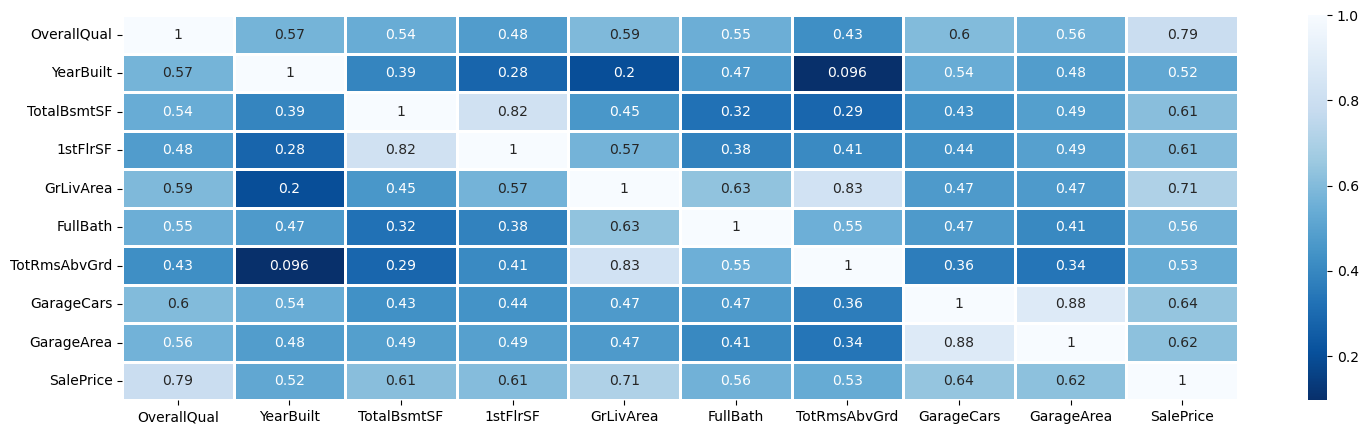

In [24]:
#highly correlated features heatmap
plt.figure(figsize=(18,5))
sns.heatmap(train_df[high_corr_features].corr(),annot=True,linewidth=2,cmap='Blues_r',)

## Feature Engineering

In [25]:
#categorical values to numerical values
train_df=pd.get_dummies(train_df,drop_first=True)
test_df=pd.get_dummies(test_df,drop_first=True)
print(f'Train shape: {train_df.shape}')
print(f'Test shape: {test_df.shape}')

Train shape: (1460, 238)
Test shape: (1459, 228)


In [26]:
#checking for whether any categorical values
len(train_df.select_dtypes(include='object').columns)

0

In [27]:
len(test_df.select_dtypes(include='object').columns)

0

### Spliting Dataset

In [28]:
X=train_df[high_corr_features.drop('SalePrice')]
y=train_df[['SalePrice']]

In [29]:
test_df=test_df[high_corr_features.drop('SalePrice')]

In [30]:
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=0)

In [31]:
print(f'X_train',X_train.shape)
print(f'y_train',y_train.shape)
print(f'X_val',X_val.shape)
print(f'y_val',y_val.shape)

X_train (1168, 9)
y_train (1168, 1)
X_val (292, 9)
y_val (292, 1)


In [32]:
#fill null values in test dataset
test_df.fillna(test_df.mode().iloc[0],inplace=True)

In [33]:
#normalize data
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_val=ss.fit_transform(X_val)
test_df=ss.fit_transform(test_df)

## Model Building

## 1. Random Forest Regressor

In [34]:
from sklearn.ensemble import RandomForestRegressor

clf_rfr = RandomForestRegressor(random_state=0)

#fit the model
clf_rfr.fit(X_train, y_train) 

RandomForestRegressor(random_state=0)

#### Prediction and mae

In [35]:
pred1 = clf_rfr.predict(X_val)

In [36]:
from sklearn.metrics import mean_absolute_error

mae1  = mean_absolute_error(y_val, pred1)
print('MAE : ',mae1)

MAE :  19511.321765737117


## 2. XGBoost Regressor

In [37]:
from xgboost import XGBRegressor

xgb= XGBRegressor(learning_rate= 0.02,n_estimators= 300,max_depth=4,random_state=0)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.02, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=300, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

#### Prediction and mae

In [38]:
pred2 = xgb.predict(X_val)

In [39]:
mae2  = mean_absolute_error(y_val, pred2)
print('MAE : ',mae2)

MAE :  18356.860980308218


## 3. CatBoost Regressor

In [40]:
from catboost import CatBoostRegressor

cbr=CatBoostRegressor(learning_rate=0.008,verbose=False,random_state=42)
cbr.fit(X_train,y_train)

#### Prediction and mae

In [41]:
pred3=cbr.predict(X_val)

In [42]:
mae3=mean_absolute_error(pred3,y_val)
print('MAE : ',mae3)

MAE :  19478.021626819376


## 4. Linear Regression 

In [43]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

#### Prediction and mae

In [44]:
pred4=lr.predict(X_val)

In [45]:
mae4=mean_absolute_error(pred4,y_val)
print('MAE : ',mae4)

MAE :  25043.025887700147


## Model Comparison

In [46]:
models=['Random Forest Regressor','XGB Regressor','CatBoost Regressor','Linear Regression']
mae=[mae1,mae2,mae3,mae4]
data={'Models':['Random ForestRegressor','XGB Regressor','CatBoost Regressor','Linear Regression'],'MAE':[mae1,mae2,mae3,mae4]}
pd.DataFrame(data).style.background_gradient(cmap='Blues_r')

,Models,MAE
0,Random ForestRegressor,19511.321766
1,XGB Regressor,18356.860980
2,CatBoost Regressor,19478.021627
3,Linear Regression,25043.025888


## Visualizing mae of 4 Models

<AxesSubplot:title={'center':'Comparing Models'}, xlabel='MAE'>

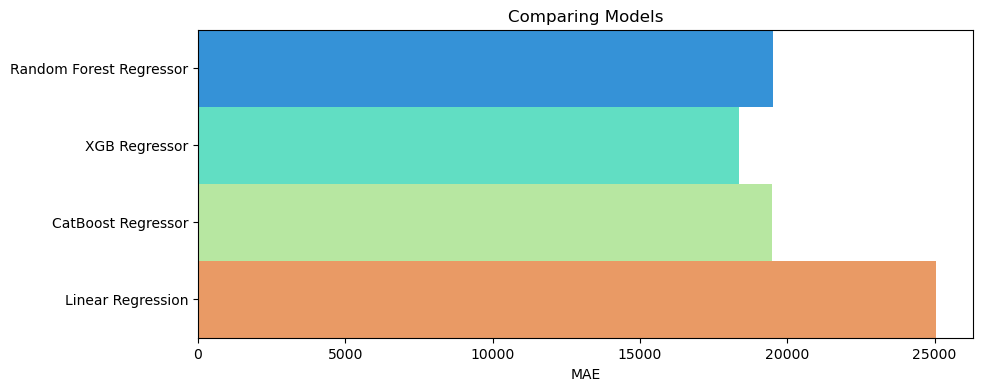

In [47]:
#plotting
plt.figure(figsize=(10,4))
plt.title('Comparing Models')
plt.xlabel('MAE')
sns.barplot(x=mae,y=models,palette='rainbow',width=1) 

## Submission

In [48]:
#prediction
prediction=xgb.predict(test_df)

In [49]:
output=pd.DataFrame({'Id':id,'SalePrice':prediction})
output.to_csv('submission_house_price.csv',index=False)

In [50]:
output.head()

,Id,SalePrice
0,1461,126476.734375
1,1462,149880.218750
2,1463,162299.718750
3,1464,177333.765625
4,1465,211456.171875
